In [20]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(3)

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                    'D:/2. 보경/0.딥러닝공부/0.김태영 케라스 강좌/0.code/handwriting_shape/train',
                    target_size=(24,24),
                    batch_size=3,
                    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    'D:/2. 보경/0.딥러닝공부/0.김태영 케라스 강좌/0.code/handwriting_shape/test',
                    target_size=(24,24),
                    batch_size=3,
                    class_mode='categorical')

verification_datagen = ImageDataGenerator(rescale=1./255)
verification_generator = verification_datagen.flow_from_directory(
                    'D:/2. 보경/0.딥러닝공부/0.김태영 케라스 강좌/0.code/handwriting_shape/verification',
                    target_size=(24,24),
                    batch_size=3,
                    class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

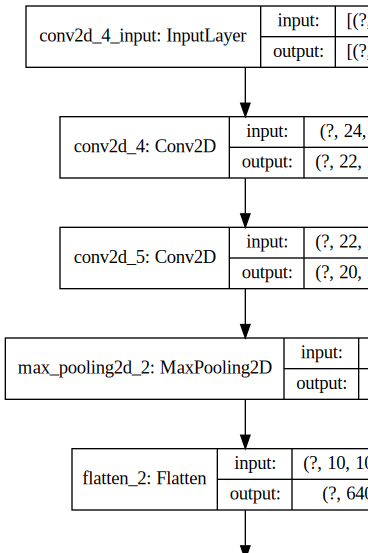

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit_generator(train_generator, steps_per_epoch=15, epochs=50, validation_data=test_generator, validation_steps=5)

Epoch 1/50
15/15 [==============================] - 0s 12ms/step - loss: 0.9896 - accuracy: 0.6222 - val_loss: 0.4948 - val_accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.1672 - accuracy: 1.0000 - val_loss: 0.2254 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0597 - accuracy: 0.9556 - val_loss: 0.0461 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 3.3240e-04 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 8/50
15/1

#### 예제 데이터

In [26]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 100.00%


In [27]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 1.000 0.000]
 [0.049 0.883 0.069]
 [0.000 0.001 0.999]
 [1.000 0.000 0.000]
 [0.998 0.000 0.002]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.002 0.998]
 [1.000 0.000 0.000]]


#### 직접 제작 데이터

In [28]:
print("-- Evaluate --")
scores = model.evaluate_generator(verification_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 33.33%


In [29]:
print("-- Predict --")
output = model.predict_generator(verification_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.048 0.029 0.923]
 [0.035 0.014 0.951]
 [0.309 0.016 0.675]
 [0.011 0.002 0.987]
 [0.082 0.070 0.849]
 [0.034 0.022 0.944]
 [0.017 0.011 0.972]
 [0.006 0.003 0.991]
 [0.095 0.057 0.848]
 [0.007 0.005 0.988]
 [0.007 0.007 0.985]
 [0.004 0.003 0.992]
 [0.015 0.006 0.979]
 [0.434 0.026 0.540]
 [0.055 0.009 0.937]]
